In [1]:
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [2]:
!nvidia-smi

Tue Mar 21 04:59:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -U "tensorflow>=2.5"

In [3]:
import tensorflow as tf

In [4]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen


# import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [5]:
import re
from shutil import copyfile
import argparse
import math
import random

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [7]:
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 82424, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 82424 (delta 193), reused 274 (delta 160), pack-reused 82094
Receiving objects: 100% (82424/82424), 596.50 MiB | 35.96 MiB/s, done.
Resolving deltas: 100% (58816/58816), done.


In [8]:
%%bash
sudo apt install -y protobuf-compiler
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
# cd /content
# git clone https://github.com/cocodataset/cocoapi.git
# cd /content/cocoapi/PythonAPI
# make
# cp -r pycocotools /content/models/research/
# cd /content/models/research/
cp object_detection/packages/tf2/setup.py .
python -m pip install .
cd /content

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5.2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2023-03-21 05:00:48.351139: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-21 05:00:48.351224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-21 05:00:48.351241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Running tests under Python 3.9.16: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-03-21 05:00:55.116720: W tensorflow/core/commo

In [10]:
output_directory = '/content/tf_lite'

In [11]:
!mkdir "/content/tf_lite"

In [ ]:
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
--trained_checkpoint_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/efficientdet_d0_tflite/workspace/my_model1/checkpoint" \
--output_directory='/content/tf_lite' \
--pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/efficientdet_d0_tflite/workspace/my_model1/pipeline.config"

In [ ]:
# !python /content/models/research/object_detection/export_tflite_graph_tf2.py \
# --trained_checkpoint_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/EfficientDet_D1_640x640/workspace/training_demo/exported-models/saved_efficientDet_D1/checkpoint" \
# --output_directory='/content/tf_lite2' \
# --pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/EfficientDet_D1_640x640/workspace/training_demo/exported-models/saved_efficientDet_D1/pipeline.config"

In [13]:
!ls -lah /content/tf_lite/saved_model/

total 7.9M
drwxr-xr-x 4 root root 4.0K Mar 21 05:03 .
drwxr-xr-x 3 root root 4.0K Mar 21 05:03 ..
drwxr-xr-x 2 root root 4.0K Mar 21 05:03 assets
-rw-r--r-- 1 root root   57 Mar 21 05:03 fingerprint.pb
-rw-r--r-- 1 root root 7.9M Mar 21 05:03 saved_model.pb
drwxr-xr-x 2 root root 4.0K Mar 21 05:03 variables


In [58]:
saved_model_dir="/content/tf_lite/saved_model"

In [59]:
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 244, 244, 3)
      yield [data.astype(np.float32)]

In [61]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.representative_dataset = representative_dataset
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8,
                                       tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_quant_model = converter.convert()

RuntimeError: ignored

In [14]:
!tflite_convert --saved_model_dir=/content/tf_lite/saved_model/ --output_file=tf_lite/efficientd0_model.tflite

2023-03-21 05:04:44.627781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-21 05:04:44.627866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-21 05:04:44.627883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-21 05:04:47.897085: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [15]:
!ls -lah tf_lite/efficientd0_model.tflite

-rw-r--r-- 1 root root 195M Mar 21 05:05 tf_lite/efficientd0_model.tflite


In [16]:
# based on https://github.com/tensorflow/examples/blob/master/lite/examples/object_detection/raspberry_pi/detect_picamera.py

from PIL import Image, ImageDraw, ImageFont
import re, glob
from six import BytesIO
import numpy as np
%matplotlib inline

def draw_image(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])

        # Draw rectangle to desired thickness
        for x in range( 0, 4 ):
            draw.rectangle((ymin, xmin, ymax, xmax), outline=(255, 255, 0), width=5)

    displayImage = np.asarray( image )
    display(Image.fromarray(displayImage))

def load_labels(path):
    """Loads the labels file. Supports files with or without index numbers."""
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        labels = {}
        for row_number, content in enumerate(lines):
            pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
            if len(pair) == 2 and pair[0].strip().isdigit():
                labels[int(pair[0])] = pair[1].strip()
            else:
                labels[row_number] = pair[0].strip()
    return labels

def set_input_tensor(interpreter, image):
    """Sets the input tensor."""
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor


def detect_objects(interpreter, image, threshold):
    """Returns a list of detection results, each a dictionary of object info."""
    set_input_tensor(interpreter, image)
    interpreter.invoke()

    # Get all output details
    scores = get_output_tensor(interpreter, 0)   #0:scores
    boxes = get_output_tensor(interpreter, 1) #1:boxes
    count = int(get_output_tensor(interpreter, 2)) #2:count
    classes = get_output_tensor(interpreter, 3) #3:classes
    # what = get_output_tensor(interpreter, 4) #3:classes
    # count = int(get_output_tensor(interpreter, 3))
    print("boxes=", boxes)
    print("classes=", classes)
    print("scores=", scores)
    print("count=", count)
    # print("what=", what)

    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
            results.append(result)
    
    return results

In [17]:
interpreter = tf.lite.Interpreter(model_path="/content/tf_lite/efficientd0_model.tflite")
interpreter.allocate_tensors()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

In [18]:
!pwd

/content


In [20]:
!pwd

/content


In [21]:
!mkdir testimages

In [19]:
!ls -al /content/testimages/

ls: cannot access '/content/testimages/': No such file or directory


/content/testimages/abyssinian.jpg
boxes= [[0.03731705 0.2587313  0.27511972 0.50948656]
 [0.0371812  0.23897566 0.86696666 0.6006501 ]
 [0.53015924 0.17735797 0.9626061  0.36632895]
 [0.6067719  0.18974675 0.93349975 0.46027023]
 [0.03329861 0.09404761 0.9781122  1.2891238 ]
 [0.0227814  0.21660805 0.503512   0.6314344 ]
 [0.08619219 0.2769137  0.9105195  0.99342257]
 [0.04272568 0.22948435 0.63219756 0.51506054]
 [0.74198365 0.18112773 0.96870613 0.49302703]
 [0.61405575 0.26330084 0.94089556 0.5503573 ]]
classes= [ 0.  0.  3.  3. 17.  0. 17.  0.  3.  3.]
scores= [0.8293388  0.14672703 0.07107208 0.05188573 0.04886873 0.04842872
 0.04642419 0.0450142  0.03528882 0.03513893]
count= 10
[{'bounding_box': array([0.03731705, 0.2587313 , 0.27511972, 0.50948656], dtype=float32), 'class_id': 0.0, 'score': 0.8293388}]


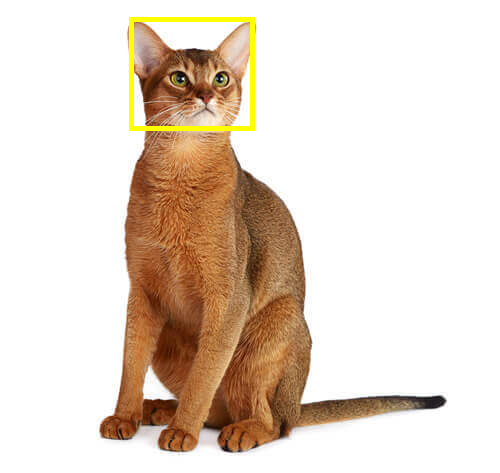

In [22]:
input_mean = 0
input_std = 1

for i, image_path in enumerate(glob.glob('/content/testimages/*.jpg')):
  print(image_path)
  image = Image.open(image_path)
  image_pred = image.resize((input_width ,input_height), Image.ANTIALIAS)
  if interpreter.get_input_details()[0]['dtype'] == np.float32:
    image_pred = (np.float32(image_pred) - input_mean) / input_std
  results = detect_objects(interpreter, image_pred, 0.2)
  print(results)

  draw_image(image, results, image.size)

In [23]:
from object_detection.utils import label_map_util

In [24]:
_ODT_LABEL_MAP_PATH = '/content/google_drive/MyDrive/Tensorflow_OD_API/efficientdet_d0_tflite/workspace/my_model1/label_map.pbtxt'
_TFLITE_LABEL_PATH = "/content/label_map.txt"

category_index = label_map_util.create_category_index_from_labelmap(
    _ODT_LABEL_MAP_PATH)
f = open(_TFLITE_LABEL_PATH, 'w')
for class_id in range(1, 38):   ###############
  if class_id not in category_index:
    f.write('???\n')
    continue
  name = category_index[class_id]['name']
  f.write(name+'\n')
f.close()

In [ ]:
# !pip install tf-nightly -q

In [ ]:
# !pip install tflite-support

In [25]:
!pip install tflite_support_nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 25.8 MB/s eta 0:00:00


In [ ]:
# !pip install -U flatbuffers

In [ ]:
# import flatbuffers

In [26]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter

In [27]:
!ls -al /content/tf_lite/

total 198976
drwxr-xr-x 3 root root      4096 Mar 21 05:05 .
drwxr-xr-x 1 root root      4096 Mar 21 05:11 ..
-rw-r--r-- 1 root root 203736792 Mar 21 05:05 efficientd0_model.tflite
drwxr-xr-x 4 root root      4096 Mar 21 05:03 saved_model


In [28]:
_MODEL_PATH="/content/tf_lite/efficientd0_model.tflite"

In [29]:
_TFLITE_MODEL_WITH_METADATA_PATH = '/content/model_with_metadata.tflite'

In [30]:
_TFLITE_LABEL_PATH="/content/models/research/object_detection/data/pet_label_map.pbtxt"

In [31]:
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), 
    [127.5], [127.5],
    [_TFLITE_LABEL_PATH])

In [32]:
writer_utils.save_file(writer.populate(), _TFLITE_MODEL_WITH_METADATA_PATH)

In [33]:
from tflite_support import metadata

In [34]:
displayer = metadata.MetadataDisplayer.with_model_file(_TFLITE_MODEL_WITH_METADATA_PATH)

In [ ]:
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

In [ ]:
# displayer = metadata.MetadataDisplayer.with_model_file("/content/model_with_metadata.tflite")

In [ ]:
# print("Metadata populated:")
# print(displayer.get_metadata_json())
# print("Associated file(s) populated:")
# print(displayer.get_packed_associated_file_list())

In [36]:
import flatbuffers
import os
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_info
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_writer
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils

In [37]:
model_meta = _metadata_fb.ModelMetadataT()

In [38]:
model_meta.name="efficientdet_d1_oxford_pet_detector"

In [39]:
model_meta.description = (
    "Identify which of a known set of objects might be present and provide "
    "information about their positions within the given image or a video "
    "stream.")

In [40]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

In [41]:
# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

In [42]:
output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("/content/label_map.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

In [43]:
output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

In [44]:
!cp "/content/models/research/object_detection/data/pet_label_map.pbtxt" "/content/label_map.txt"

In [45]:
output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())


In [46]:
# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [47]:
populator = _metadata.MetadataPopulator.with_model_file("/content/model_with_metadata.tflite")
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["/content/label_map.txt"])
populator.populate()

In [ ]:
displayer = metadata.MetadataDisplayer.with_model_file(_TFLITE_MODEL_WITH_METADATA_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

In [ ]:
# displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
# export_json_file = os.path.join(FLAGS.export_directory,
#                     os.path.splitext(model_basename)[0] + ".json")
# json_file = displayer.get_metadata_json()
# # Optional: write out the metadata as a json file
# with open(export_json_file, "w") as f:
#   f.write(json_file)

In [50]:
interpreter = tf.lite.Interpreter(model_path="/content/model_with_metadata.tflite")
interpreter.allocate_tensors()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

In [53]:
!ls -al

total 199004
drwxr-xr-x  1 root root      4096 Mar 21 05:15 .
drwxr-xr-x  1 root root      4096 Mar 21 04:58 ..
drwxr-xr-x  4 root root      4096 Mar 17 13:39 .config
drwx------  5 root root      4096 Mar 21 04:59 google_drive
-rw-r--r--  1 root root      1532 Mar 21 05:20 label_map.txt
drwxr-xr-x 10 root root      4096 Mar 21 04:59 models
-rw-r--r--  1 root root 203741358 Mar 21 05:22 model_with_metadata.tflite
drwxr-xr-x  1 root root      4096 Mar 17 13:40 sample_data
drwxr-xr-x  2 root root      4096 Mar 21 05:11 testimages
drwxr-xr-x  3 root root      4096 Mar 21 05:05 tf_lite


In [ ]:
input_mean = 0
input_std = 1

for i, image_path in enumerate(glob.glob('/content/testimages/*.jpg')):
  print(image_path)
  image = Image.open(image_path)
  image_pred = image.resize((input_width ,input_height), Image.ANTIALIAS)
  print(np.float32(image_pred))
  print("*" * 60)
  if interpreter.get_input_details()[0]['dtype'] == np.float32:
    image_pred = (np.float32(image_pred) - input_mean) / input_std
    print(image_pred)
  results = detect_objects(interpreter, image_pred, 0.2)
  print(results)

  draw_image(image, results, image.size)

In [54]:
saved_model_dir  = "/content/model_with_metadata.tflite"

In [56]:
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# converter.representative_dataset = representative_dataset
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]
# tflite_quant_model = converter.convert()

OSError: ignored

In [62]:
!pip install -q netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [63]:
!curl --output smartreply.zip https://storage.googleapis.com/download.tensorflow.org/models/tflite/smartreply_1.0_2017_11_01.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5842k  100 5842k    0     0  20.5M      0 --:--:-- --:--:-- --:--:-- 20.5M


In [64]:
!unzip smartreply.zip

Archive:  smartreply.zip
  inflating: smartreply.tflite       
  inflating: backoff_response.txt    


In [65]:
import netron
import portpicker
from google.colab import output

port = portpicker.pick_unused_port()

In [67]:
port

21809

In [68]:
netron.start('/content/model_with_metadata.tflite')

Serving '/content/model_with_metadata.tflite' at http://localhost:8081


('localhost', 8081)

In [66]:
with output.temporary():
  netron.start('/content/model_with_metadata.tflite', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

<IPython.core.display.Javascript object>